# ДЗ №1. Обучение модели линейной регрессии методом градиентного спуска

__Цель работы__: реализовать обучение модели линейной регрессии методом градиентного спуска

__Постановка задачи__: матрицей объекты-признаки $X$ и столбцом целевой переменной $\vec{y}$ задана обучающая выборка. Построить модель линейной регрессии $\vec{\widehat{y}} = X \vec{\theta}$, приближающую значения целевой переменной на обучающей выборке. В качестве функции потерь используется среднеквадратичная ошибка $L(X, \vec{y}, \vec{\theta}) = \lVert X\vec{\theta} - \vec{y} \rVert^2_2 = \left(X\vec{\theta} - \vec{y}\right)^T \left(X\vec{\theta} - \vec{y}\right)$. Градиент функции потерь: $\nabla_{\vec{\theta}}L(X, \vec{y}, \vec{\theta}) = 2X^T\left(X\vec{\theta} - \vec{y}\right)$.

In [53]:
import numpy as np
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sc

Xtr = np.load('./X_train.npy')
ytr = np.load('./y_train.npy')

In [54]:
data = pd.DataFrame(np.hstack((Xtr, ytr)), columns=['Feature {}'.format(i) for i in range(1, 5)] + ['Target feature'])

In [55]:
data

,Feature 1,Feature 2,Feature 3,Feature 4,Target feature
0,-1.379859,-1.639242,1.904012,-2.627268,2.468626
1,-5.411598,-5.495438,29.285391,-158.480757,9.998146
2,-4.299786,-4.594803,18.488158,-79.495119,9.279000
3,-6.005137,-5.921348,36.061665,-216.555224,8.634806
4,-6.420339,-6.364172,41.220748,-264.651158,9.567111
...,...,...,...,...,...
9995,5.179724,5.468711,26.829543,138.969632,16.540534
9996,1.252368,1.022007,1.568426,1.964247,-0.693184
9997,3.642290,3.738478,13.266275,48.319618,4.453555
9998,3.657986,3.907226,13.380859,48.946990,4.996794


Для исследования попарной зависимости исходных признаков воспользуемся методом `pairplot` модуля `seaborn`.

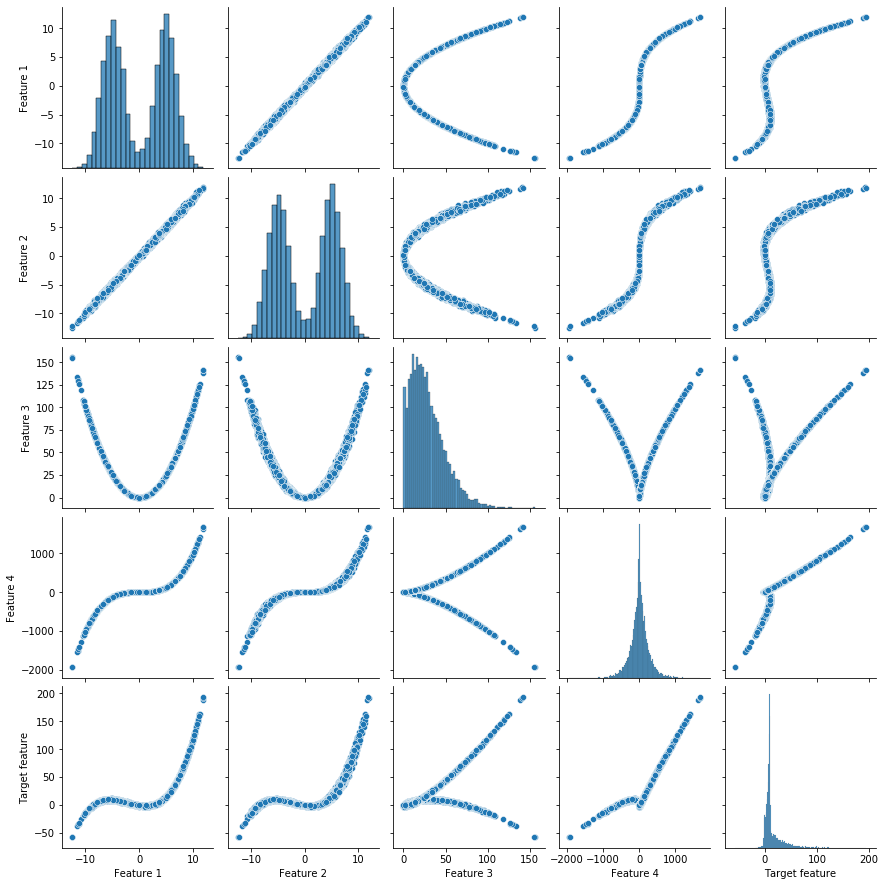

In [56]:
sns.pairplot(data)

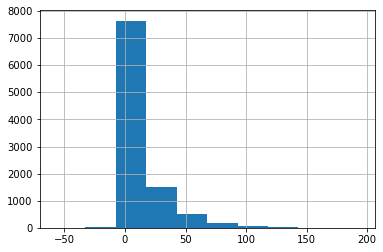

In [57]:
target = data['Target feature']
target.hist()

In [58]:
data.corr()

,Feature 1,Feature 2,Feature 3,Feature 4,Target feature
Feature 1,1.000000,0.999308,0.009250,0.881007,0.597918
Feature 2,0.999308,1.000000,0.009691,0.880310,0.597378
Feature 3,0.009250,0.009691,1.000000,0.018994,0.599567
Feature 4,0.881007,0.880310,0.018994,1.000000,0.787092
Target feature,0.597918,0.597378,0.599567,0.787092,1.000000


Видно, что зависимости между признаками похожи на полиномиальные. _Признаки 1 и 2 скоррелированы, поэтому можем удалить из обучающей выборки признак 2, он избыточен для оценки параметров модели._ Нормализуем $X$ и $\vec{y}$ и дополним $X$ столбцом единиц, чтобы модель включала в себя слагаемое сдвига $\theta_0$: $\widehat{y}_i = \theta_0 + \sum_{j=1}^{n}x_{ij}\theta_j$

In [60]:
Xtr = np.delete(Xtr, 1, axis=1)
# Xtr = (Xtr - np.min(Xtr, axis=0)) / (np.max(Xtr, axis=0) - np.min(Xtr, axis=0))    # Normalize the data
# ytr = (ytr - np.min(ytr)) / (np.max(ytr) - np.min(ytr))

Xtr = (Xtr - np.mean(Xtr, axis=0)) / (np.std(Xtr, axis=0))    # Standartize the data
ytr = (ytr - np.mean(ytr)) / (np.std(ytr))

Xtr = np.hstack((Xtr, np.ones((Xtr.shape[0], 1))))

_Теперь матрица $X$ имеет полный столбцовый ранг, столбцы некоррелированы. Такие данные должны хорошо описываться линейной регрессией._

Классы для решения задачи:

In [61]:
class Differentiable:
    def __init__(self):
        pass
    
    def forward(self, **kwargs):
        raise NotImplementedError()
    
    def backward(self, **kwargs):
        raise NotImplementedError()

In [62]:
class loss(Differentiable):
    def __init__(self):
        super(loss, self).__init__()
    
    def forward(self, y_pred, y_true):
        # Этот метод реализует вычисление значения функции потерь
        # Подсказка: метод должен возвращать единственный скаляр - значение функции потерь
        loss_value = 0.0
        
        ### YOUR CODE HERE
        loss_value = 1 / len(y_true) * sc.linalg.norm(y_pred - y_true)
                
        return loss_value
    
    
    def backward(self, y_pred, y_true):
        # Этот метод реализует вычисление градиента функции потерь по аргументу y_pred
        # Подсказка: метод должен возвращать вектор градиента функции потерь
        #           размерностью, совпадающей с размерностью аргумента y_pred
        
        partial_grad = np.zeros_like(y_pred-y_true)
        
        ### YOUR CODE HERE
        partial_grad = 2 / len(y_pred) * (y_pred - y_true)
        
        return partial_grad

In [63]:
class linear_regression(Differentiable):
    def __init__(self):
        super(linear_regression, self).__init__()
        self.theta = None
    
    def __call__(self, X):
        # этот метод предназначен для вычисления значения целевой переменной
        return self.forward(X)
    
    def backward(self, X):
        # Этот метод реализует вычисление компоненты градиента функции потерь
        
        partial_grad = 0.0
        
        ### YOUR CODE HERE
        partial_grad = 2 / X.shape[0] * np.dot(X.T, np.dot(X, self.theta))
        
        return partial_grad
    
    def forward(self, X):
        # этот метод предназначен для применения модели к данным
        assert X.ndim == 2, "X should be 2-dimensional: (N of objects, n of features)"
        
        if (self.theta is None):
            # Если вектор параметров еще не инициализирован, его следует инициализировать
            # Подсказка: длина вектора параметров может быть получена из размера матрицы X
            self.theta = 0.0
            
            ### YOUR CODE HERE
            self.theta = np.ones(X.shape[1])
        
        
        # Здесь следует собственно применить модель к входным данным
        # Подсказка: удобно расширить матрицу X дополнительным признаком,
        #            чтобы применять матричные операции, очень эффективно реализованные в numpy
        
        y_pred = 0.0
        
        ### YOUR CODE HERE
        y_pred = np.dot(X, self.theta)
        
        return y_pred

Цикл оптимизации параметров методом градиентного спуска:

In [79]:
def train_loop(X, y, model, loss_fn, epochs=100):
    loss_history = []
    holdout_error_history = []
    pbar = tqdm(total=epochs)
    for epoch in range(epochs):
        # В этом цикле следует реализовать итеративную процедуру оптимизации параметров модели model,
        #        руководствуясь функцией потерь loss_fn
        
        ### YOUR CODE HERE
        loss_value = loss_fn.forward(model.forward(X), y)
        grad = model.backward(X)
        model.theta = model.theta - 0.005*model.backward(X)
        holdout_error = loss_fn.forward(model.forward(X_test), y_test)
        
        loss_history.append(loss_value)
        holdout_error_history.append(holdout_error)
        pbar.update(1)
        pbar.set_postfix({'loss': loss_value})
    pbar.close()
    return (loss_history, holdout_error_history)

Разделим данные на обучающую и тестовую выборки.

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xtr, ytr, test_size=0.2, random_state=1)

In [81]:
obj_fn = loss()
lr_model = linear_regression()
loss_history, holdout_error_history = train_loop(X_train, y_train, lr_model, obj_fn, epochs=1000)

100%|██████████| 1000/1000 [04:26<00:00,  3.75it/s, loss=1]  


Эволюция функции ошибки:

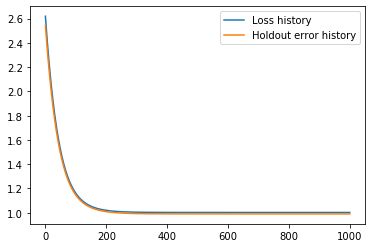

In [82]:
plt.plot(loss_history, label='Loss history')
plt.plot(holdout_error_history, label='Holdout error history')
plt.legend()
plt.show()

_Модель обладает достаточно хорошей обобщающей способностью на предложенных данных, функция потерь при обучении ведет себя аналогично на обучающей выборке и отложенной тестовой выборке, что говорит об отсутствии переобучения на предложенных данных._

Проверим гипотезу о случайности ошибок с помощью критерия Стьюдента: $\mathbb{E}\left(\vec{\varepsilon} \mid X\right) = 0$, где $\vec{\varepsilon} = \vec{y} - X\vec{\theta}$.

In [84]:
from statsmodels.stats.weightstats import zconfint

print(zconfint(residuals))
sc.stats.ttest_1samp(residuals, 0)

(-0.03246540785272595, 0.05438050753981477)


Ttest_1sampResult(statistic=0.49458637070210865, pvalue=0.6209464741017148)

_Гипотеза подтверждается на уровне значимости $0.05$, что также подтверждает, что данные хорошо описываются линейной регрессией._